In [18]:
from io import BytesIO

import imageio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

In [4]:
plt.rc('font', size=20)
plt.rc('figure', figsize=(15, 3))

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255

In [38]:
def display_digits(inputs, outputs, ground_truth, n):
    plt.clf()
    plt.yticks([])
    plt.grid(None)
    inputs = np.reshape(inputs, [n, 28, 28])
    inputs = np.swapaxes(inputs, 0, 1)
    inputs = np.reshape(inputs, [28, n * 28])
    plt.imshow(inputs)
    plt.xticks([28*x + 14 for x in range(n)], outputs)
    for i, t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if outputs[i] == ground_truth[i]:
            t.set_color('green')
        else:
            t.set_color('red')
    plt.grid(None)

In [39]:
GIF = './animation.gif'

In [40]:
class VisCallback(Callback):
    def __init__(
            self, inputs, ground_truth, display_freq=10, n_samples=10):
        self.inputs = inputs
        self.ground_truth = ground_truth
        self.images = []
        self.display_freq = display_freq
        self.n_samples = n_samples
        
    def on_epoch_end(self, epoch, logs=None):
        idx = np.random.choice(len(self.inputs), size=self.n_samples)
        X_test, y_test = self.inputs[idx], self.ground_truth[idx]
        preds = np.argmax(self.model.predict(X_test), axis=1)
        display_digits(X_test, preds, y_test, n=self.display_freq)
        buf = BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        img = Image.open(buf)
        self.images.append(np.array(img))
        if epoch % self.display_freq == 0:
            plt.show()
            
    def on_train_end(self, logs=None):
        imageio.mimsave(GIF, self.images, fps=1)

In [41]:
def get_model():
    mod = Sequential([Dense(32, activation='linear', input_dim=784),
                      Dense(10, activation='softmax')])
    mod.compile(optimizer=RMSprop(lr=1e-4), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
    return mod

In [42]:
mod = get_model()

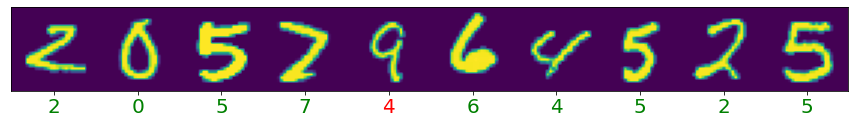

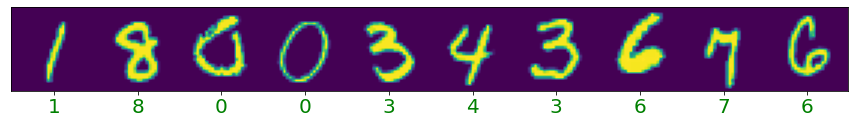

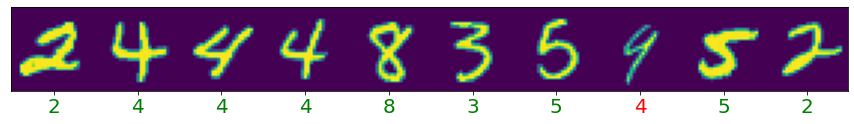

In [43]:
mod.fit(X_train, 
        y_train, 
        batch_size=64, 
        epochs=20, 
        verbose=0, 
        callbacks=[VisCallback(X_test, y_test)]);

In [44]:
!open $GIF